# Part 1: Data Dictionary


*   Survival: 0 = No, 1 = Yes
*   pclass: Tecket class 1 = 1st, 2 = 2nd, 3 = 3rd
*   Sex: Male or Female
*   Age: Age in years
*   SibSp: No. of Siblings ((step-) brother/sister)/ spouses (husband/ wife)aboard Titanic
*   Parch: No of parents/ children aboard the Titanic
*   Ticket: Ticket number
*   Fare: Passenger Fare
*   Cabin: Cabin Number
*   Embarked: Port of Embarkation (Cherbourg, Queenstown, Southampton)

# Part 2: Importing

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame', False)
pd.set_option('max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
train = pd.read_excel('titanic_train.xlsx')
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test = pd.read_excel('titanic_test.xlsx')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          887 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isna().mean().round(4)*100

PassengerId    0.00 
Survived       0.00 
Pclass         0.00 
Name           0.00 
Sex            0.00 
Age            0.45 
SibSp          0.00 
Parch          0.00 
Ticket         0.00 
Fare           0.00 
Cabin          77.10
Embarked       0.00 
dtype: float64

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,887.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.362649,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.129009,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


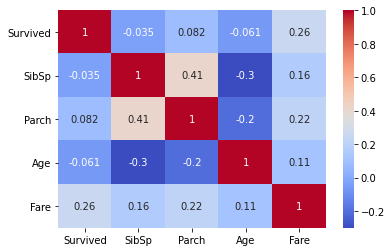

In [ ]:
heatmap = sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, cmap = "coolwarm")

# Part 3: Cleaning Data

In [ ]:
frames = [train, test]
titanic = pd.concat(frames)
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
titanic.groupby('Pclass').Fare.mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [ ]:
titanic.Fare = titanic.Fare.fillna(0)

In [ ]:
# Fill empty "Embarked" cells with "S"

print(titanic.Embarked.value_counts())
titanic.Embarked = titanic.Embarked.fillna("S")

S    916
C    270
Q    123
Name: Embarked, dtype: int64


In [ ]:
titanic.Cabin = titanic.Cabin.fillna('Unknown_Cabin')
titanic['Cabin'] = titanic['Cabin'].str[0]
titanic.groupby('Pclass').Cabin.value_counts()

Pclass  Cabin
1       C        94 
        U        67 
        B        65 
        D        40 
        E        34 
        A        22 
        T        1  
2       U        254
        F        13 
        D        6  
        E        4  
3       U        693
        F        8  
        G        5  
        E        3  
Name: Cabin, dtype: int64

In [ ]:
titanic['Cabin'] = np.where((titanic.Pclass==1) & (titanic.Cabin=='U'), 'C',
                            np.where((titanic.Pclass==2) & (titanic.Cabin=='U'), 'D',
                                     np.where((titanic.Pclass==3)& (titanic.Cabin=='U'), 'G',
                                              np.where(titanic.Cabin=='T','C',titanic.Cabin))))

In [ ]:
titanic['Title'] = titanic.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(titanic['Title'],titanic['Sex'])
titanic = titanic.drop('Name', axis=1)

In [ ]:
# Let's replace and fix a few titles

titanic['Title'] = np.where((titanic.Title=='Capt') | (titanic.Title=='Countess') | (titanic.Title=='Don') |(titanic.Title=='Dona') |
                            (titanic.Title=='Jonkheer') |(titanic.Title=='Lady') |(titanic.Title=='Sir') |(titanic.Title=='Major') |
                            (titanic.Title=='Rev') |(titanic.Title=='Col'), 'Other', titanic.Title)

titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

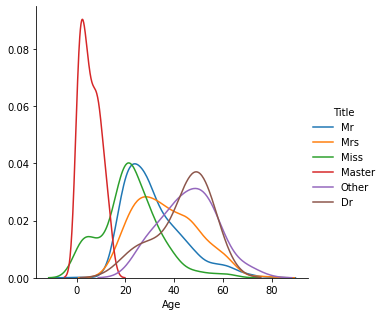

In [ ]:
titanic[['Title','Survived']].groupby(['Title'], as_index=False).mean()
facet = sns.FacetGrid(data=titanic, hue="Title", legend_out=True, size = 4.5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

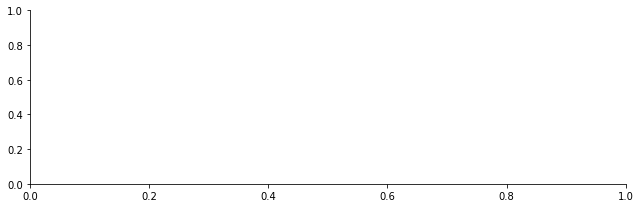

In [ ]:
fcet = sns.FacetGrid(titanic, hue='Survived', aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()

In [ ]:
titanic['Age'] = np.where((titanic.Age.isnull()) & (titanic.Title=='Master'), 5,
                            np.where((titanic.Age.isnull()) & (titanic.Title=='Miss'), 22,
                                     np.where((titanic.Age.isnull()) & (titanic.Title=='Mr'), 32,
                                              np.where((titanic.Age.isnull()) & (titanic.Title=='Mrs'), 37,
                                                       np.where((titanic.Age.isnull()) & (titanic.Title=='Other'), 45,
                                                                np.where((titanic.Age.isnull()) & (titanic.Title=='Dr'), 44, titanic.Age))))))

In [ ]:
titanic['FamilySize'] = titanic.SibSp + titanic.Parch + 1
titanic['Mother'] = np.where((titanic.Title=='Mrs') & (titanic.Parch > 0), 1, 0)
titanic['Free'] = np.where(titanic['Fare']==0,1,0)
titanic = titanic.drop(['SibSp', 'Parch', 'Sex', 'Ticket', 'PassengerId'], axis=1)

In [ ]:
bins = [0, 12, 24, 45, 60, titanic.Age.max()]
labels = ['Child', 'Young Adult', 'Adult', 'Older Adult', 'Senior']
titanic["Age"] = pd.cut(titanic['Age'], bins, labels = labels)

In [ ]:
titanic = pd.get_dummies(titanic)

In [ ]:
# Apply log to Fare to reduce distribution skew

titanic['Fare'] = titanic['Fare'].map(lambda i: np.log(i) if i>0 else 0)

In [ ]:
titanic.head()

,Pclass,Fare,Survived,FamilySize,Mother,Free,Age_Child,Age_Young Adult,Age_Adult,Age_Older Adult,Age_Senior,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,1.981001,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,1,4.266662,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,3,2.070022,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,1,3.972177,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,3,2.085672,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
X = titanic
y = X.pop('Survived')

In [ ]:
# Train Test Split
## Unlike the usual, we split out the first 891 rows for training, and the remainder for testing

X_train = X.iloc[:891]
y_train = y.iloc[:891]

X_test = X.iloc[891:]
y_test = y.iloc[891:]

# Part 4: Machine Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
K_fold = StratifiedKFold(n_splits=10, random_state=42)

In [ ]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('Weighted Precision = ', precision_score(y_test, y_pred, average='weighted'))
print('Weighted Recall = ', recall_score(y_test, y_pred, average='weighted'))
print('Weighted F1 Score = ', f1_score(y_test, y_pred, average='weighted'))

Accuracy =  0.7703349282296651
Weighted Precision =  0.7738289600101728
Weighted Recall =  0.7703349282296651
Weighted F1 Score =  0.7716363193336877


In [ ]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('Weighted Precision = ', precision_score(y_test, y_pred, average='weighted'))
print('Weighted Recall = ', recall_score(y_test, y_pred, average='weighted'))
print('Weighted F1 Score = ', f1_score(y_test, y_pred, average='weighted'))

Accuracy =  0.7440191387559809
Weighted Precision =  0.7443491052584988
Weighted Recall =  0.7440191387559809
Weighted F1 Score =  0.7441797945687229


In [ ]:
# Gradient Boosting Classifier

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('Weighted Precision = ', precision_score(y_test, y_pred, average='weighted'))
print('Weighted Recall = ', recall_score(y_test, y_pred, average='weighted'))
print('Weighted F1 Score = ', f1_score(y_test, y_pred, average='weighted'))

Accuracy =  0.7631578947368421
Weighted Precision =  0.7648013624918779
Weighted Recall =  0.7631578947368421
Weighted F1 Score =  0.763868752786388


In [ ]:
# XGB Classifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('Weighted Precision = ', precision_score(y_test, y_pred, average='weighted'))
print('Weighted Recall = ', recall_score(y_test, y_pred, average='weighted'))
print('Weighted F1 Score = ', f1_score(y_test, y_pred, average='weighted'))

Accuracy =  0.7727272727272727
Weighted Precision =  0.7757979971835393
Weighted Recall =  0.7727272727272727
Weighted F1 Score =  0.7738999906182569


In [ ]:
# Random Forest Classifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('Weighted Precision = ', precision_score(y_test, y_pred, average='weighted'))
print('Weighted Recall = ', recall_score(y_test, y_pred, average='weighted'))
print('Weighted F1 Score = ', f1_score(y_test, y_pred, average='weighted'))

Accuracy =  0.7535885167464115
Weighted Precision =  0.7585560362437923
Weighted Recall =  0.7535885167464115
Weighted F1 Score =  0.7553398958052423


In [ ]:
# LGBM Classifier

LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

y_pred = LGBM.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('Weighted Precision = ', precision_score(y_test, y_pred, average='weighted'))
print('Weighted Recall = ', recall_score(y_test, y_pred, average='weighted'))
print('Weighted F1 Score = ', f1_score(y_test, y_pred, average='weighted'))

Accuracy =  0.7488038277511961
Weighted Precision =  0.752941672362725
Weighted Recall =  0.7488038277511961
Weighted F1 Score =  0.7503511628962243


# Part 5: Next Steps

*   SHAP
*   Catboost

